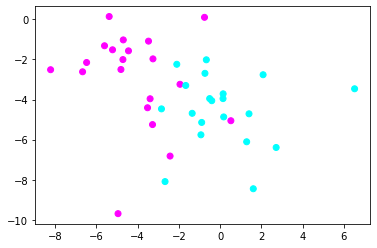

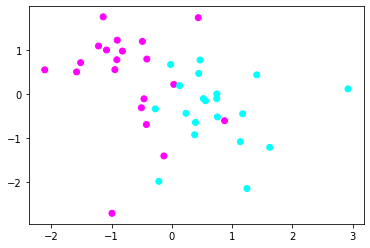

In [3]:
# Data Pre-processing
# StandardScaler, -> mean 0, sd 1
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

X, y = make_blobs(n_samples=40, centers=2, random_state=50, cluster_std=2)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.cool)
plt.show()

X_1 = StandardScaler().fit_transform(X)
plt.scatter(X_1[:, 0], X_1[:, 1], c=y, cmap=plt.cm.cool)
plt.show()

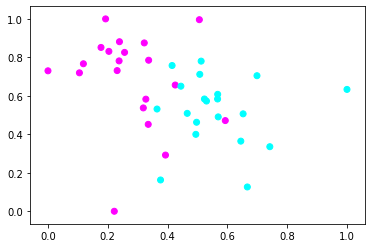

In [4]:
# MinMaxScaler -> range [0, 1]
from sklearn.preprocessing import MinMaxScaler
X_2 = MinMaxScaler().fit_transform(X)
plt.scatter(X_2[:, 0], X_2[:, 1], c=y, cmap=plt.cm.cool)
plt.show()

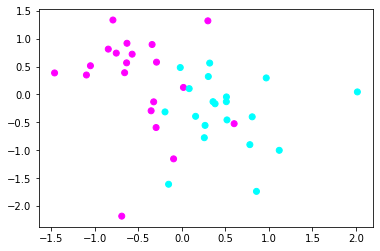

In [5]:
# RobustScaler -> auto remove outliers
from sklearn.preprocessing import RobustScaler
X_3 = RobustScaler().fit_transform(X)
plt.scatter(X_3[:, 0], X_3[:, 1], c=y, cmap=plt.cm.cool)
plt.show()

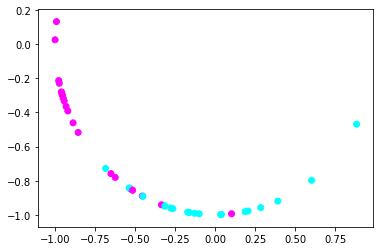

In [6]:
# Normalizer -> only keep direction (from 0, 0), ignore scale
from sklearn.preprocessing import Normalizer
X_4 = Normalizer().fit_transform(X)
plt.scatter(X_4[:, 0], X_4[:, 1], c=y, cmap=plt.cm.cool)
plt.show()

In [11]:
# improve predicting results by preprocessing
from sklearn.datasets import load_wine
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

wine = load_wine()
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, random_state=62)
mlp = MLPClassifier(hidden_layer_sizes=[100, 100], max_iter=800, random_state=62)
mlp.fit(X_train, y_train)
print('{:.2f}'.format(mlp.score(X_test, y_test)))

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_pp = scaler.transform(X_train)
X_test_pp = scaler.transform(X_test)
mlp.fit(X_train_pp, y_train)
print('{:.2f}'.format(mlp.score(X_test_pp, y_test)))

0.93
1.00


In [14]:
# Dimension Reduction (PCA)
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
X, y = wine.data, wine.target
X_scaled = scaler.fit_transform(X)
print('before PCA：', X_scaled.shape)
pca = PCA(n_components=2)            # n_components: int-> # of dimension kept, float(0,1) -> % of variance kept
pca.fit(X_scaled)
X_pca = pca.transform(X_scaled)
print('after PCA：', X_pca.shape)

before PCA： (178, 13)
after PCA： (178, 2)


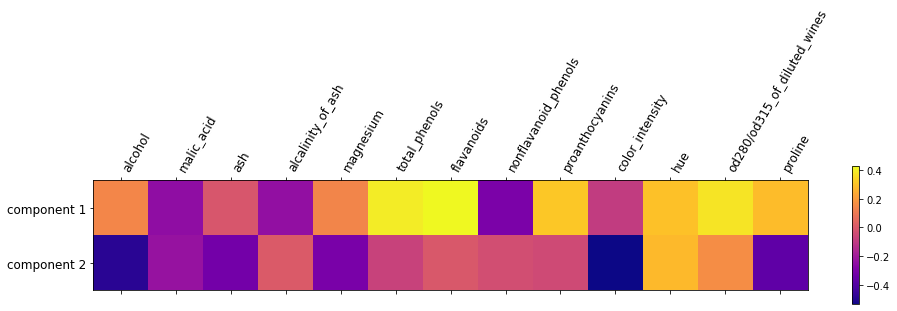

In [25]:
# principal component on heatmap
#help(pca)
plt.matshow(pca.components_, cmap='plasma')
plt.yticks([0, 1], ['component 1', 'component 2'], size=12)
plt.colorbar()
plt.xticks(range(len(wine.feature_names)), wine.feature_names, rotation=60, size=12, ha='left')
plt.show()

In [ ]:
# Feature Extraction
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA

#faces = fetch_lfw_people(min_faces_per_person=20, resize=0.8)
#X_train, X_test, y_train, y_test = train_test_split(faces.data / 255, faces.target, random_state=62)

#mlp = MLPClassifier(hidden_layer_sizes=[100, 100], random_state=62, max_iter=400)
#mlp.fit(X_train, y_train)
#print('{:.2f}'.format(mlp.score(X_test, y_test)))


In [ ]:
'''
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')
X,y = mnist['data'],mnist['target']
'''